# Insight on Global Warming

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("GlobalLandTemperaturesByMajorCity.csv")

In [4]:
data.dropna(axis=0 , inplace=True)

In [5]:
data["Month"]=data["dt"].map(lambda x:int(x.split("-")[1]))

In [6]:
data["Year"]=data["dt"].map(lambda x:int(x.split("-")[0]))

In [7]:
data.drop(axis=1 ,labels="dt" ,inplace=True)

In [8]:
data.drop(axis=1 ,labels="AverageTemperatureUncertainty" ,inplace=True)

In [9]:
bangalore_avg=data[data["City"]=="Bangalore"].groupby("Year").mean()["AverageTemperature"]

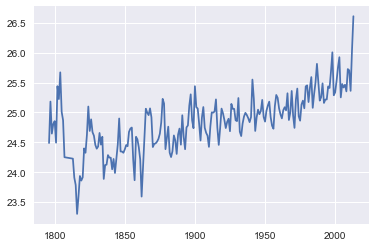

In [10]:
plt.plot(bangalore_avg)

In [11]:
def group_a_month(city,mon):
    tmp=data[(data["City"]==city) & (data["Month"]==mon)][["Year" , "AverageTemperature"]]
    tmp.set_index("Year" ,inplace="True")
    return tmp

In [16]:
def group_all_months(city):
    month=[]
    month.append(0);
    for i in range(1,13):
        month.append(group_a_month(city,i))
    return month    
    
        
    

In [25]:
def group_all_cities():
    cities={}
    for city in data["City"].unique():
        cities[city]=group_all_months(city)
        
    return cities

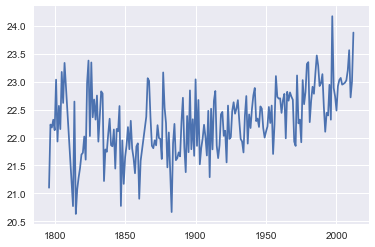

In [26]:
plt.plot(group_all_months("Bangalore")[12])

In [27]:
def plot_a_city(city):
    city_plot=group_all_months(city)
    fig,axes =plt.subplots(nrows=12 ,ncols=1,figsize=(13,70))
    for i in range(0,12):
        axes[i].plot(city_plot[i+1])
        axes[i].set_xlabel("Years")
        axes[i].set_ylabel("Temperature")
        axes[i].set_title("Month " + str(i+1))
        
    

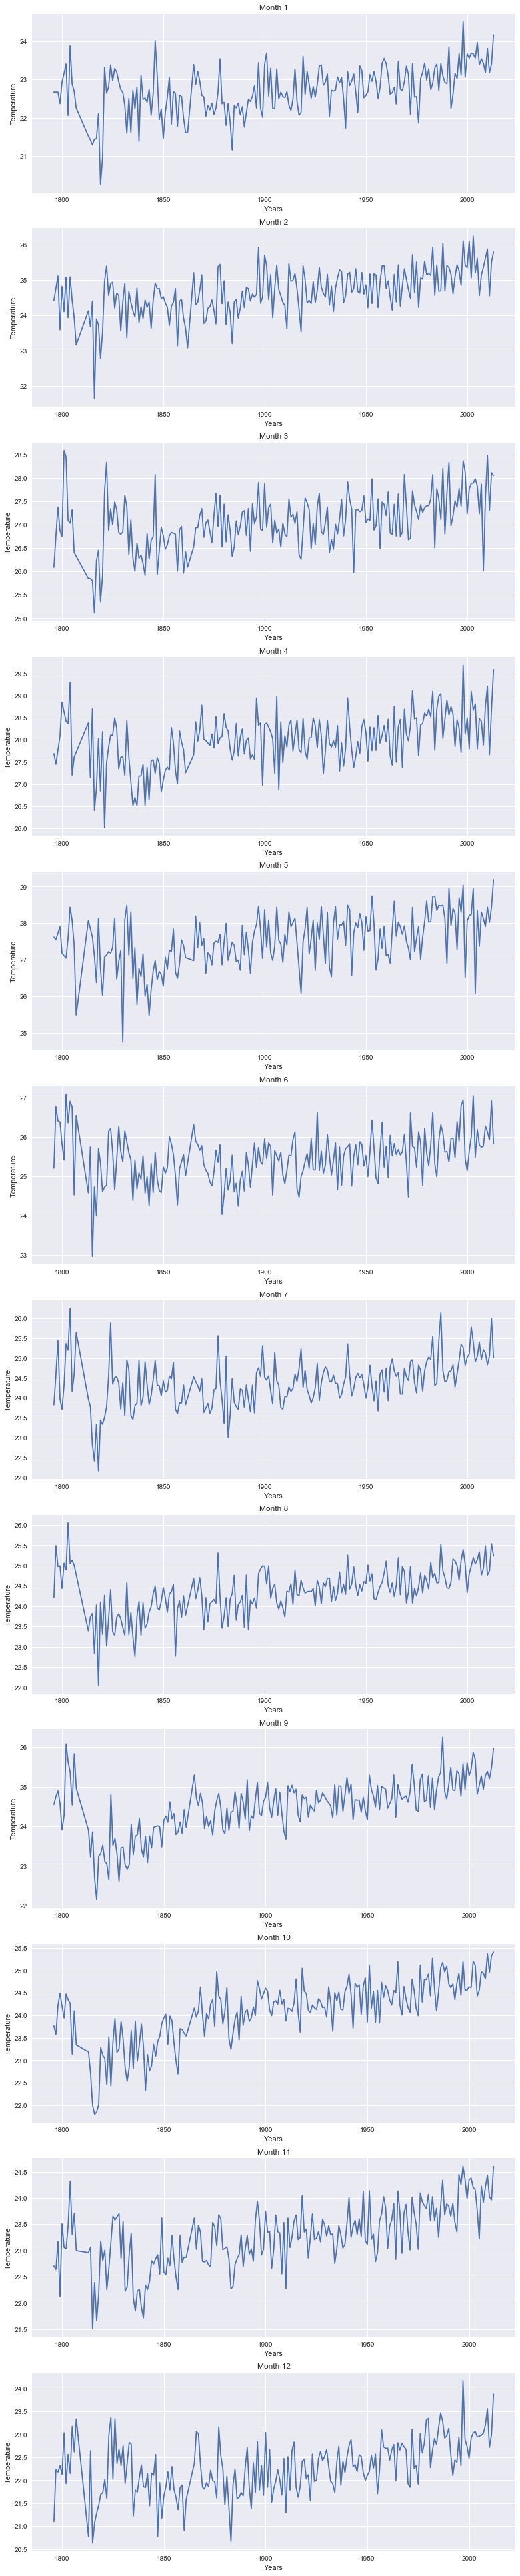

In [28]:
plot_a_city("Bangalore")

In [29]:
data_set=group_all_cities()

In [32]:
data_set

{'Abidjan': [0,       AverageTemperature
  Year                    
  1849              26.704
  1850              25.803
  1851              26.789
  1856              26.689
  1857              26.549
  1858              26.454
  1859              26.176
  1860              26.532
  1861              25.189
  1862              25.427
  1874              26.501
  1875              25.566
  1876              25.608
  1877              25.845
  1878              26.433
  1879              25.803
  1880              26.109
  1881              27.011
  1882              26.757
  1883              26.031
  1884              26.224
  1886              26.070
  1887              25.302
  1888              25.134
  1889              24.959
  1890              25.965
  1891              25.886
  1892              26.481
  1893              25.592
  1894              25.997
  ...                  ...
  1984              27.405
  1985              26.884
  1986              26.593
  1987        